<a href="https://colab.research.google.com/github/devikaajay/DS_IntermediateAssessment1/blob/main/Intermediate_Assessment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Intermediate Assessment 1**

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Part 1: Data Loading

In [ ]:
# 1. Load the california_housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [ ]:
# 2. Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())
print("\n" + "="*50 + "\n")

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  




In [ ]:
# 3. Print the column names and their data types
print("Column names and their data types:")
print(df.info())
print("\n" + "="*50 + "\n")

Column names and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None




In [ ]:
# 4. Check for missing values in the dataset
print("Missing values in the dataset:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

Missing values in the dataset:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64




In [ ]:
# 5. Get basic statistical summaries using describe().
print("Basic statistical summaries:")
print(df.describe())
print("\n" + "="*50 + "\n")

Basic statistical summaries:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  PricePerRoom  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.070655     35.631861   -119.569704      2.068558      0.398999   
std       10.386050   

In [ ]:
# 6. Check for and remove any duplicated rows
print("Number of duplicated rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicated rows after removal:", df.duplicated().sum())
print("\n" + "="*50 + "\n")

Number of duplicated rows: 0
Number of duplicated rows after removal: 0




##Part 2: Data Cleaning

In [95]:
# 7. Handle missing values if any: Fill missing numerical features with the mean value.
print("Missing values before handling:")
print(df.isnull().sum())
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
mean_values = df[numerical_cols].mean()
df.fillna(mean_values, inplace=True)
print("Missing values after handling:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

Missing values before handling:
MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
MedHouseVal           0
PricePerRoom          0
HighPopulationArea    0
IncomeCategory        0
dtype: int64
Missing values after handling:
MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
MedHouseVal           0
PricePerRoom          0
HighPopulationArea    0
IncomeCategory        0
dtype: int64




In [ ]:
# 8. Create a new column PricePerRoom
df['PricePerRoom'] = df['MedHouseVal'] / df['AveRooms']
print("First 5 rows with PricePerRoom:")
print(df[['MedHouseVal', 'AveRooms', 'PricePerRoom']].head())
print("\n" + "="*50 + "\n")

First 5 rows with PricePerRoom:
   MedHouseVal  AveRooms  PricePerRoom
0        4.526  6.984127      0.648041
1        3.585  6.238137      0.574691
2        3.521  8.288136      0.424824
3        3.413  5.817352      0.586693
4        3.422  6.281853      0.544744




In [ ]:
# 9. Create a column HighPopulationArea
df['HighPopulationArea'] = (df['Population'] > 500).astype(int)
print("Value counts for HighPopulationArea:")
print(df['HighPopulationArea'].value_counts())
print("\n" + "="*50 + "\n")

Value counts for HighPopulationArea:
HighPopulationArea
1    18660
0     1980
Name: count, dtype: int64




In [ ]:
# 10. Bin the median_income into 5 equal-sized bins and label them as Very Low, Low, Medium, High, Very High. (Hint: pd.cut)
bins = pd.cut(df['MedInc'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['IncomeCategory'] = bins
print("Value counts for IncomeCategory:")
print(df['IncomeCategory'].value_counts())
print("\n" + "="*50 + "\n")

Value counts for IncomeCategory:
IncomeCategory
Very Low     9683
Low          9088
Medium       1488
High          271
Very High     110
Name: count, dtype: int64




In [ ]:
# 11. Drop columns that seem redundant after feature creation (if any)
print(df.columns)
print("\n" + "="*50 + "\n")

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'PricePerRoom',
       'HighPopulationArea', 'IncomeCategory'],
      dtype='object')




##Part 3: Data Visualization

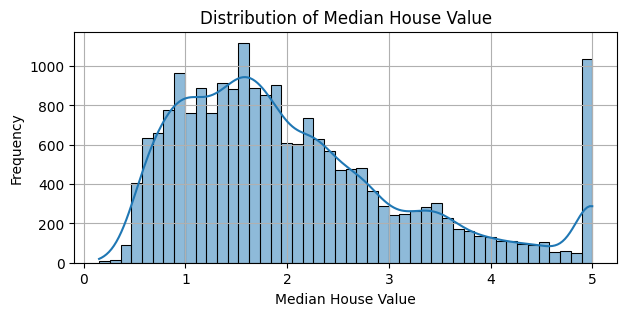

In [ ]:
# 12. Plot the distribution of median_house_value with a histogram
plt.figure(figsize=(7,3))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

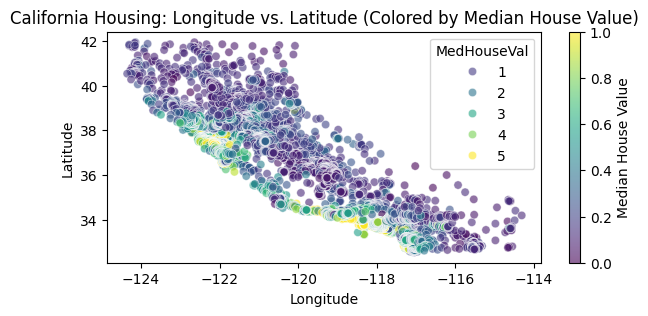

In [ ]:
# 13. Create a scatter plot of longitude vs latitude, colored by median_house_value
plt.figure(figsize=(7, 3))
scatter_plot = sns.scatterplot(x='Longitude', y='Latitude', hue='MedHouseVal', data=df, palette='viridis', alpha=0.6)
plt.title('California Housing: Longitude vs. Latitude (Colored by Median House Value)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter_plot.collections[0], label='Median House Value')
plt.show()

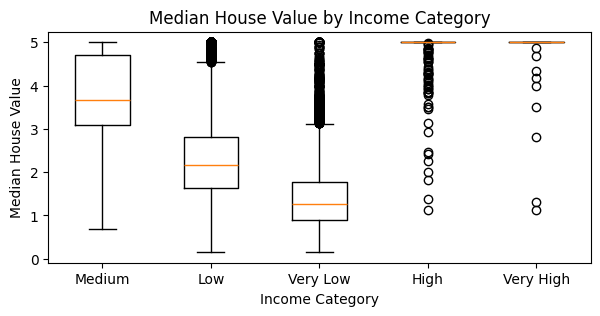

In [94]:
# 14. Plot a boxplot of MedHouseVal grouped by the new income categories
plt.figure(figsize=(7, 3))
income_categories = df['IncomeCategory'].unique()
income_categories = pd.Categorical(income_categories, categories=['Very Low', 'Low', 'Medium', 'High', 'Very High'], ordered=True)
data = [df[df['IncomeCategory'] == cat]['MedHouseVal'] for cat in income_categories]
plt.boxplot(data, tick_labels=income_categories)
plt.title('Median House Value by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Median House Value')
plt.show()

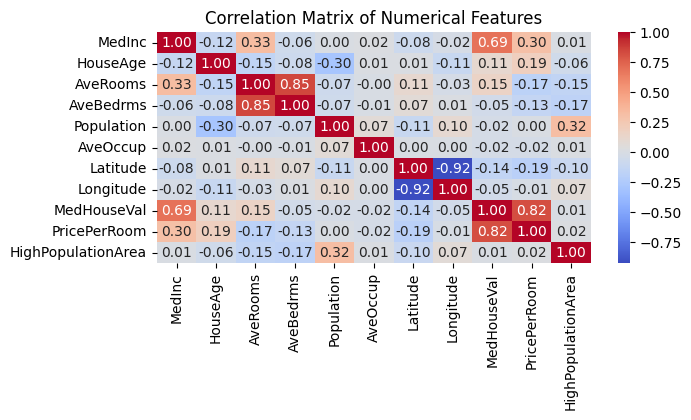

In [ ]:
# 15. Plot the correlation matrix heatmap between numerical features
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(7, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

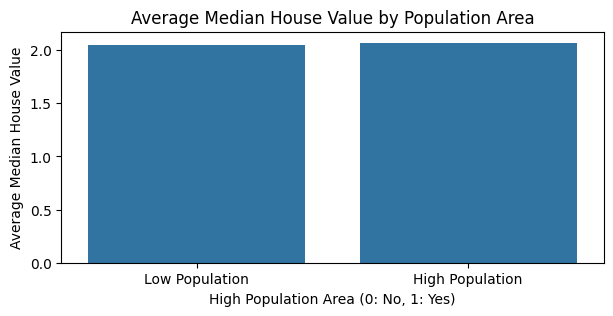

In [ ]:
# 16. Create a bar plot showing average median_house_value for high population vs low population areas
average_price_by_population = df.groupby('HighPopulationArea')['MedHouseVal'].mean().reset_index()
plt.figure(figsize=(7, 3))
sns.barplot(x='HighPopulationArea', y='MedHouseVal', data=average_price_by_population)
plt.title('Average Median House Value by Population Area')
plt.xlabel('High Population Area (0: No, 1: Yes)')
plt.ylabel('Average Median House Value')
plt.xticks([0, 1], ['Low Population', 'High Population'])
plt.show()

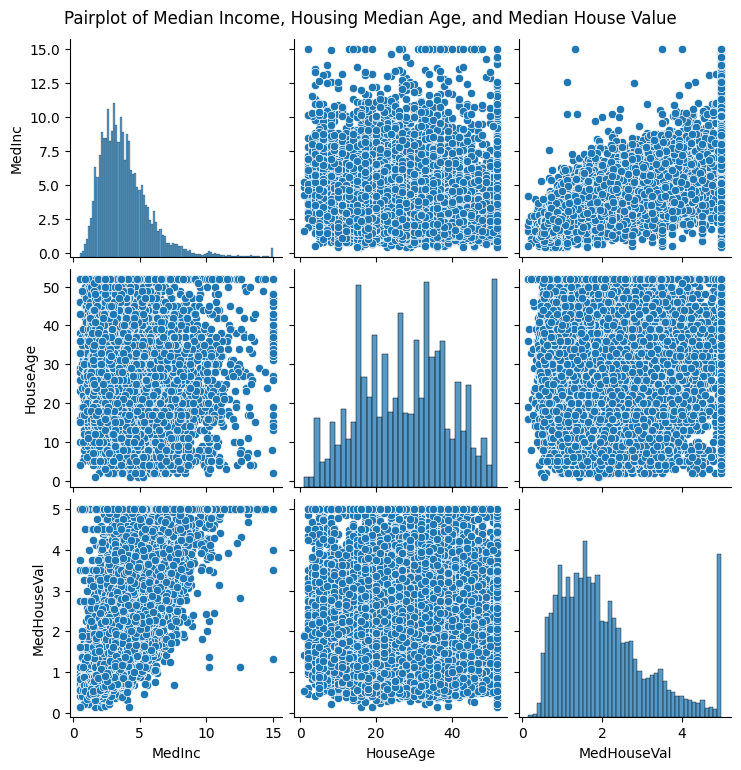

In [ ]:
# 17. Create a pairplot (sns.pairplot) for selected features: median_income, housing_median_age, median_house_value.
selected_features = ['MedInc', 'HouseAge', 'MedHouseVal']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Median Income, Housing Median Age, and Median House Value', y=1.02)
plt.show()